## Content 

 <b>1 | Preprocessing Steps</b>
 
    1.1 Import Libraries
    1.2 Configure Settings
    1.3 Import Files
    1.4 Prepare Data

 <b>2 | Structure Investigation</b>
 
    2.1 Basic Steps
    2.2 Null Value Check
    2.3 Structure of numerical features
    
    
 <b>3 | Univariate Analysis</b>
 
    3.1 Summary for Columns (Describe)
    3.2 Individual Column Shape Observation
    3.3 Individual Column Value Observation (Min, Max and Outlier)

 <b>4 | Multivariate Analysis</b>
 
    4.1 Creating Relation Matrix and Graph
    4.2 Relation With Quality
    4.3 Other Interesting Relationships (Leaving Quality)
 
 


## 1 | Preprocessing Steps

#### 1.1 | Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2 | Configure Settings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

#### 1.3 | Import Files

In [3]:
df_raw=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/6_Red_Wine_Quality/Dataset/winequality-red.csv")
df=df_raw.copy()

## 2 | Structure Investigation

#### 2.1 | Basic Steps

In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
pd.value_counts(df.dtypes)

float64    11
int64       1
dtype: int64

***
#### 2.2 | Null Value Check
* No null values Observed
***

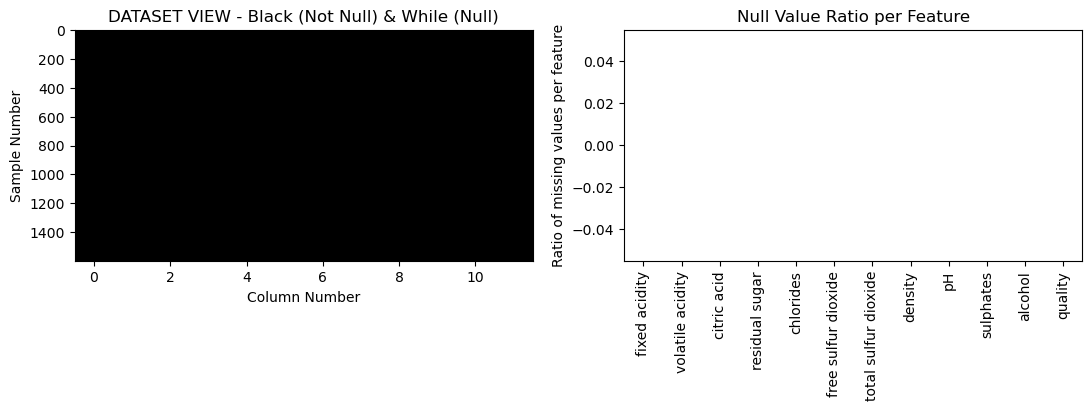

In [8]:
# Combined Plot

plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

#### 2.4 | Structure of features

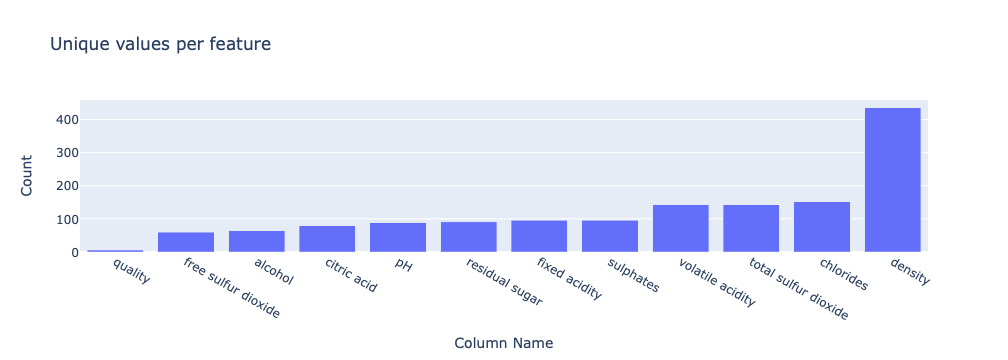

In [9]:
temp_data=df.nunique().sort_values()
fig = px.bar(x=temp_data.index,y=temp_data.values,title='Unique values per feature',labels={'x':'Column Name','y':'Count'})
fig.show()

In [10]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

***
#### 2.5 | Value Behaviour

* Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. 
* The y-axis shows the feature value, while the x-axis is the sample index
***

* Observation

    * Values in each subpots appear to be continous in range except last column quality
    * quality seems to take discrete values as points apprears to be in discrete intervals
***

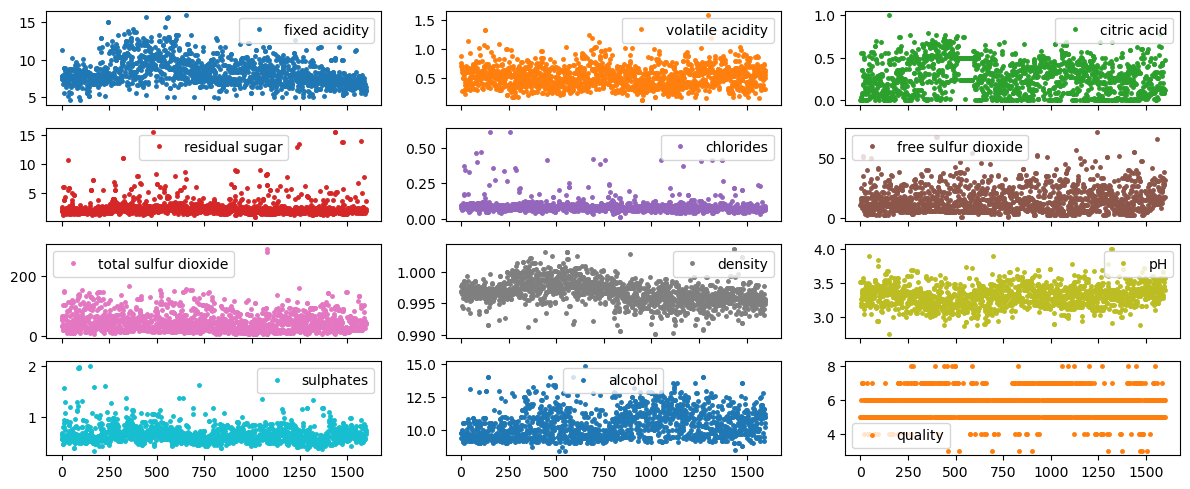

In [11]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5)
plt.tight_layout()

## 3 | Univariate Content Analysis

#### 3.1 | Summary for Columns (Describe)

In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

***
#### 3.2 | Individual Column Shape 
***

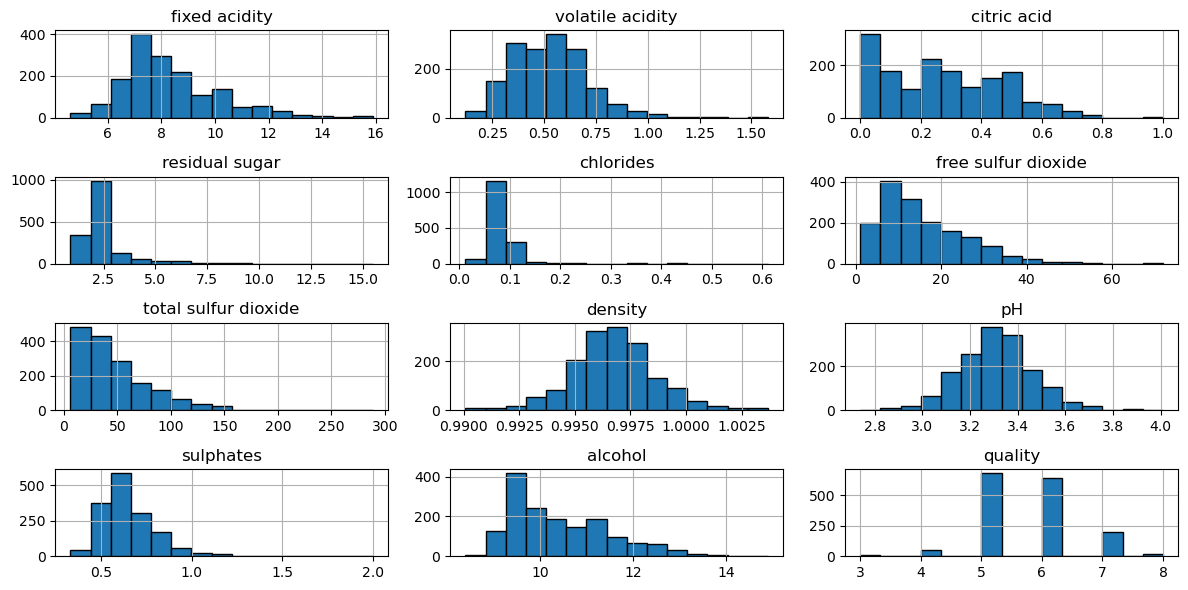

In [13]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,6)
layout_val=(-1, 3)
df.hist(bins=15, figsize=figsize_val, layout=layout_val, edgecolor="black")
plt.tight_layout();

In [14]:
df.skew().sort_values()

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

***
#### 3.3 | Individual Column Value Observation (Min, Max and Outlier)

* We have used min/max for finding corners ,  box plot to visualise and iqr method to list outlier countries
* Highest Quality is not present in min max of any column
* Citric acid has least no of outlier values in terms of iqr method
* Below is the min max and outlier for all columns    
 
*****
 <b>fixed acidity <b/>
* Min Value -> 4.6 | quality ->  4
* Max Value -> 15.9 | quality ->  5
* No of Outliers presesnt ->  49

 **********

<b>volatile acidity <b/>
* Min Value -> 0.12 | quality ->  7
* Max Value -> 1.58 | quality ->  3
* No of Outliers presesnt ->  15

 **********

<b>citric acid <b/>
* Min Value -> 0.0 | quality ->  3, 4, 5, 6, 7
* Max Value -> 1.0 | quality ->  4
* No of Outliers presesnt ->  1

 **********

<b>residual sugar <b/>
* Min Value -> 0.9 | quality ->  6
* Max Value -> 15.5 | quality ->  5
* No of Outliers presesnt ->  155

 **********

<b>chlorides <b/>
* Min Value -> 0.012 | quality ->  7
* Max Value -> 0.611 | quality ->  5
* No of Outliers presesnt ->  109

 **********

<b>free sulfur dioxide <b/>
* Min Value -> 1.0 | quality ->  6
* Max Value -> 72.0 | quality ->  6
* No of Outliers presesnt ->  30

 **********

<b>total sulfur dioxide <b/>
* Min Value -> 6.0 | quality ->  5, 6
* Max Value -> 289.0 | quality ->  7
* No of Outliers presesnt ->  55

 **********

<b>density <b/>
* Min Value -> 0.99007 | quality ->  6
* Max Value -> 1.00369 | quality ->  6
* No of Outliers presesnt ->  71

 **********

<b>pH <b/>
* Min Value -> 2.74 | quality ->  4
* Max Value -> 4.01 | quality ->  6
* No of Outliers presesnt ->  31

 **********

<b>sulphates <b/>
* Min Value -> 0.33 | quality ->  4
* Max Value -> 2.0 | quality ->  4
* No of Outliers presesnt ->  58

 **********

<b>alcohol <b/>
* Min Value -> 8.4 | quality ->  3, 6
* Max Value -> 14.9 | quality ->  5
* No of Outliers presesnt ->  13

 **********

In [15]:
len(df.columns)

12

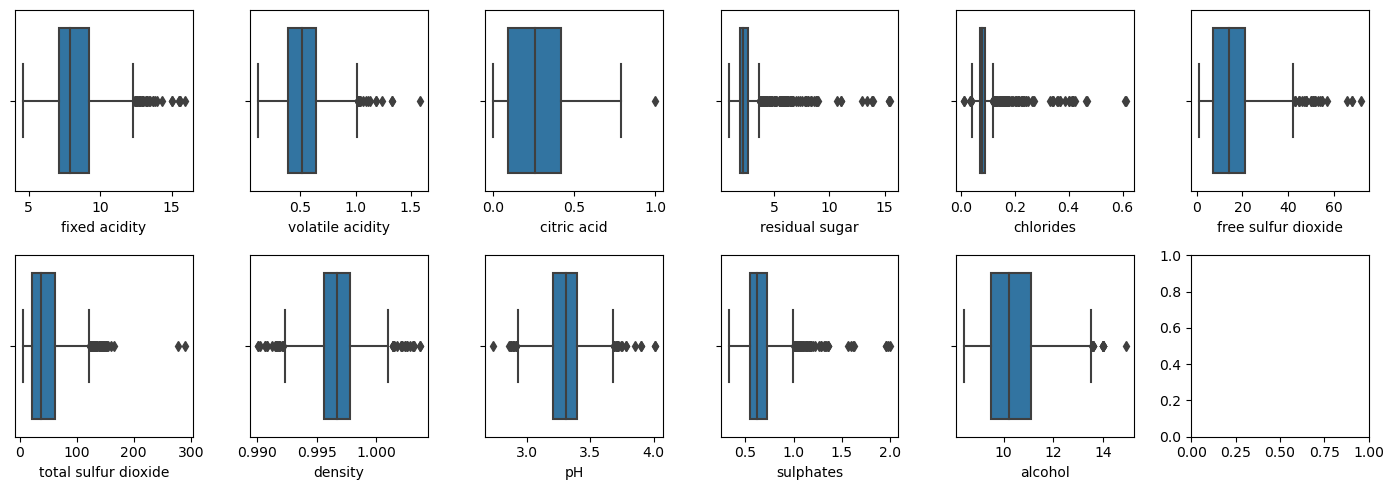

In [16]:
vars=df.columns
y=6
x=math.ceil(len(vars)/y)

plt.subplots(x,y,figsize=(14,5))

for i in range(1,len(vars)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,x=vars[i-1])
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()    
plt.show()

In [17]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

columns_to_be_checked=vars[:-1]

for i in columns_to_be_checked:
    temp_min=df[df[i]== df[i].min()][['quality',i]]
    temp_max=df[df[i]== df[i].max()][['quality',i]]
    
    print('\nColumn -> ',i,'\nMin Value ->',temp_min[i].values[0],'| quality -> ',
          str(set(temp_min['quality'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    print('Max Value ->',temp_max[i].values[0],'| quality -> ',
          str(set(temp_max['quality'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers presesnt -> ',len(x))
    print('\n','*'*10)


Column ->  fixed acidity 
Min Value -> 4.6 | quality ->  4
Max Value -> 15.9 | quality ->  5
No of Outliers presesnt ->  49

 **********

Column ->  volatile acidity 
Min Value -> 0.12 | quality ->  7
Max Value -> 1.58 | quality ->  3
No of Outliers presesnt ->  15

 **********

Column ->  citric acid 
Min Value -> 0.0 | quality ->  3, 4, 5, 6, 7
Max Value -> 1.0 | quality ->  4
No of Outliers presesnt ->  1

 **********

Column ->  residual sugar 
Min Value -> 0.9 | quality ->  6
Max Value -> 15.5 | quality ->  5
No of Outliers presesnt ->  155

 **********

Column ->  chlorides 
Min Value -> 0.012 | quality ->  7
Max Value -> 0.611 | quality ->  5
No of Outliers presesnt ->  109

 **********

Column ->  free sulfur dioxide 
Min Value -> 1.0 | quality ->  6
Max Value -> 72.0 | quality ->  6
No of Outliers presesnt ->  30

 **********

Column ->  total sulfur dioxide 
Min Value -> 6.0 | quality ->  5, 6
Max Value -> 289.0 | quality ->  7
No of Outliers presesnt ->  55

 **********

Co

## 4 | Multivariate Investigation

#### 4.1 | Creating Relation Matrix and Graph

In [18]:
temp_corr=df.corr()
temp_corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

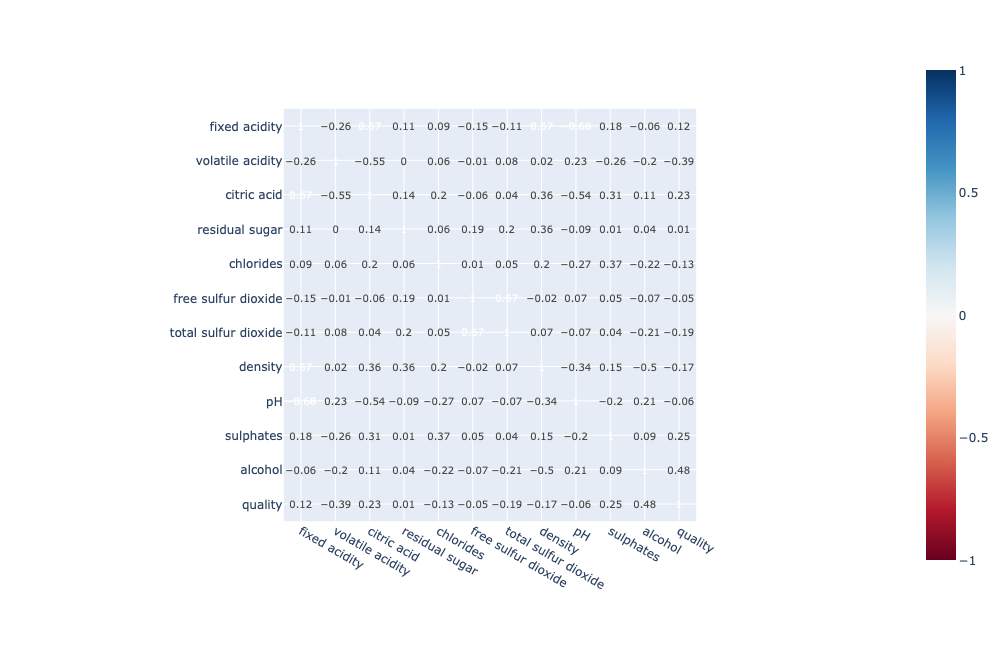

In [19]:
fig = px.imshow(df.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale='rdbu')
fig.show()

#### 4.2 | Relation With Quality (Numerical)

    * Strong          ->  None

    * Moderate        ->  None

    * Weak            ->  volatile acidity, sulphates, alcohol

    * No_relationship ->  fixed acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH

In [20]:
# Used spearman since quality exhibits ordinal variable with categorical behaviours
temp_corr_score=df.corr(method='spearman').loc[['quality']]
temp_corr_score

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality       0.114084         -0.380647     0.213481        0.032048   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality  -0.189922            -0.056901             -0.196735 -0.177074   

               pH  sulphates   alcohol  quality  
quality -0.043672    0.37706  0.478532      1.0

In [21]:
# Observing relationship type with corr values

temp_corr_score.drop(columns='quality',inplace=True)
strong=[]
moderate=[]
weak=[]
no_relationship=[]
for y in temp_corr_score.columns:
    p=temp_corr_score[y][0]
    if p >= 0.75 or p <= -0.75:
        strong.append(y)
    elif p >= 0.50 or p <= -0.50:
        moderate.append(y)
    elif p >= 0.25 or p <= -0.25:
        weak.append(y)
    else :
        no_relationship.append(y)

In [22]:
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  []

Weak ->  ['volatile acidity', 'sulphates', 'alcohol']

No_relationship ->  ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']


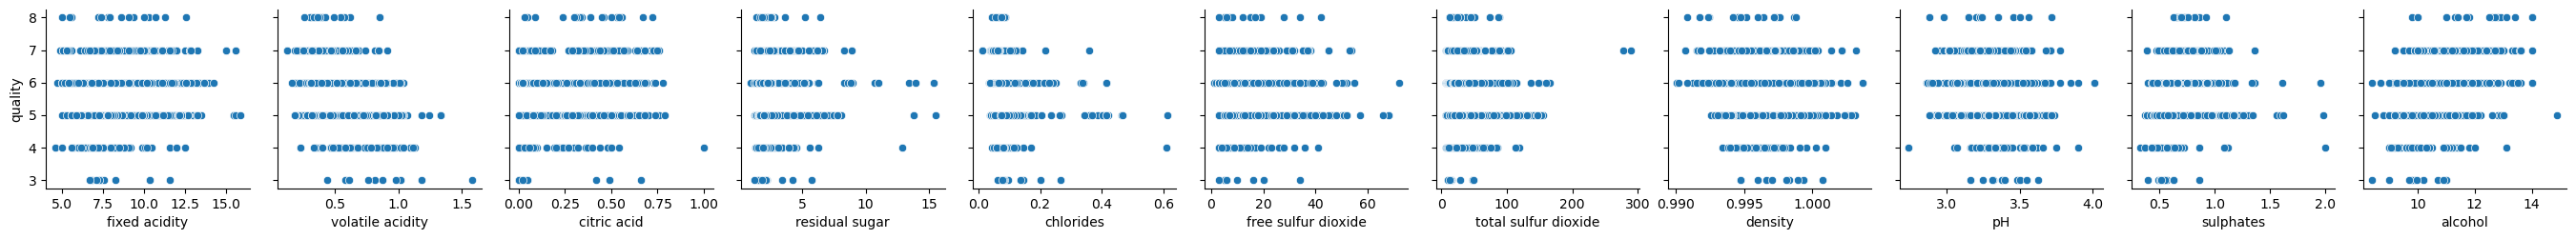

In [23]:
sns.pairplot(data=df,
                  y_vars='quality',
                  x_vars=df.drop(columns='quality').columns
            
)
                  
plt.show()


#### Observation
* Looking at alcohol vs quality it seems drink with higher alcohol content tends to have high ratings
* Looking at volatile acidity it seems drink with lower volatile acidity content tends to have higher ratings
* Looking at sulphates vs quality it seems drink with higher alcohol content tends to have high ratings

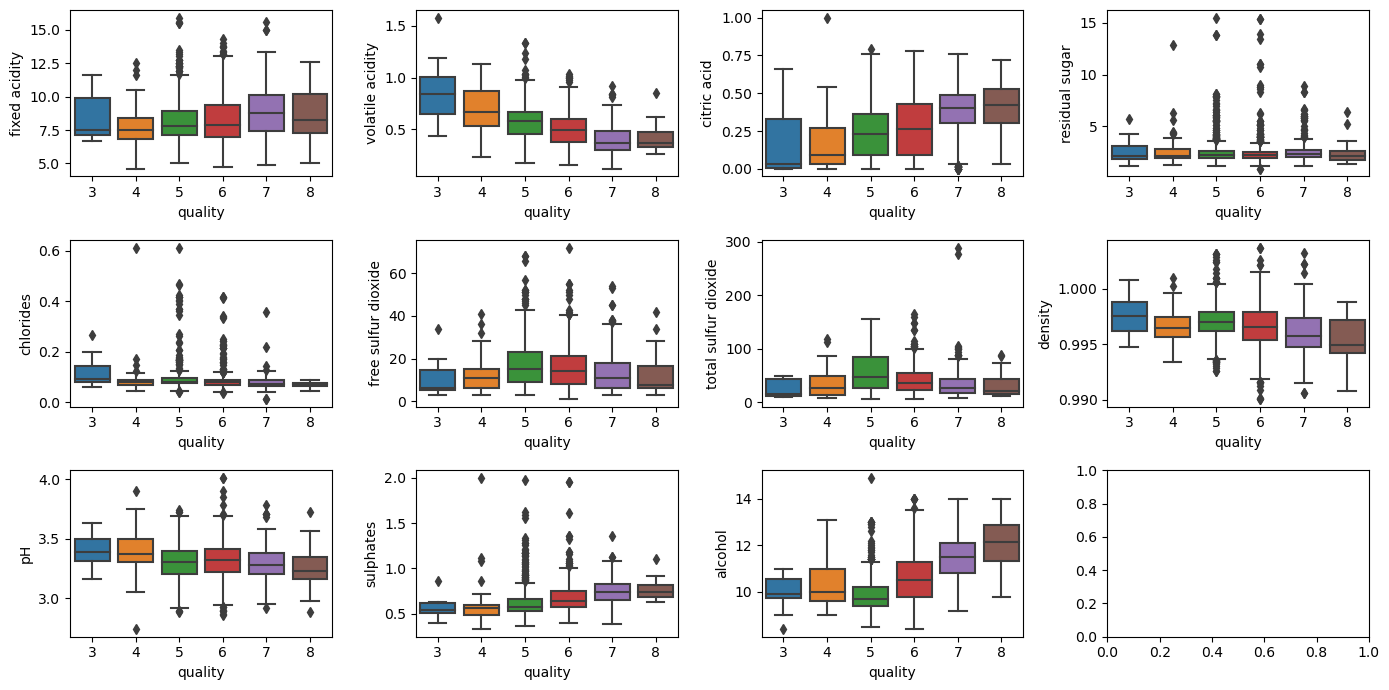

In [24]:
y=4
x=math.ceil(len(df.columns)/y)

plt.subplots(x,y,figsize=(14,7))

for i in range(1,len(vars)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,y=vars[i-1],x='quality')
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()    
plt.show()

#### Observation
* Median of high rating drinks is higher in sulphates, alcohol and citric acid
* Median of high rating drinks is lower in chlorides, density and residual sugar 

#### 4.3 | Other Interesting Relationships (Leaving Quality)

* Fixed Acidity shares moderate raltaionship with citric acid, density and pH .
* volatile acidity has moderate raltaionship with citric acid.
* citric acid has moderate relationship with pH.
* free sulfur dioxide has moderate raltaionship with total sulfur dioxide .

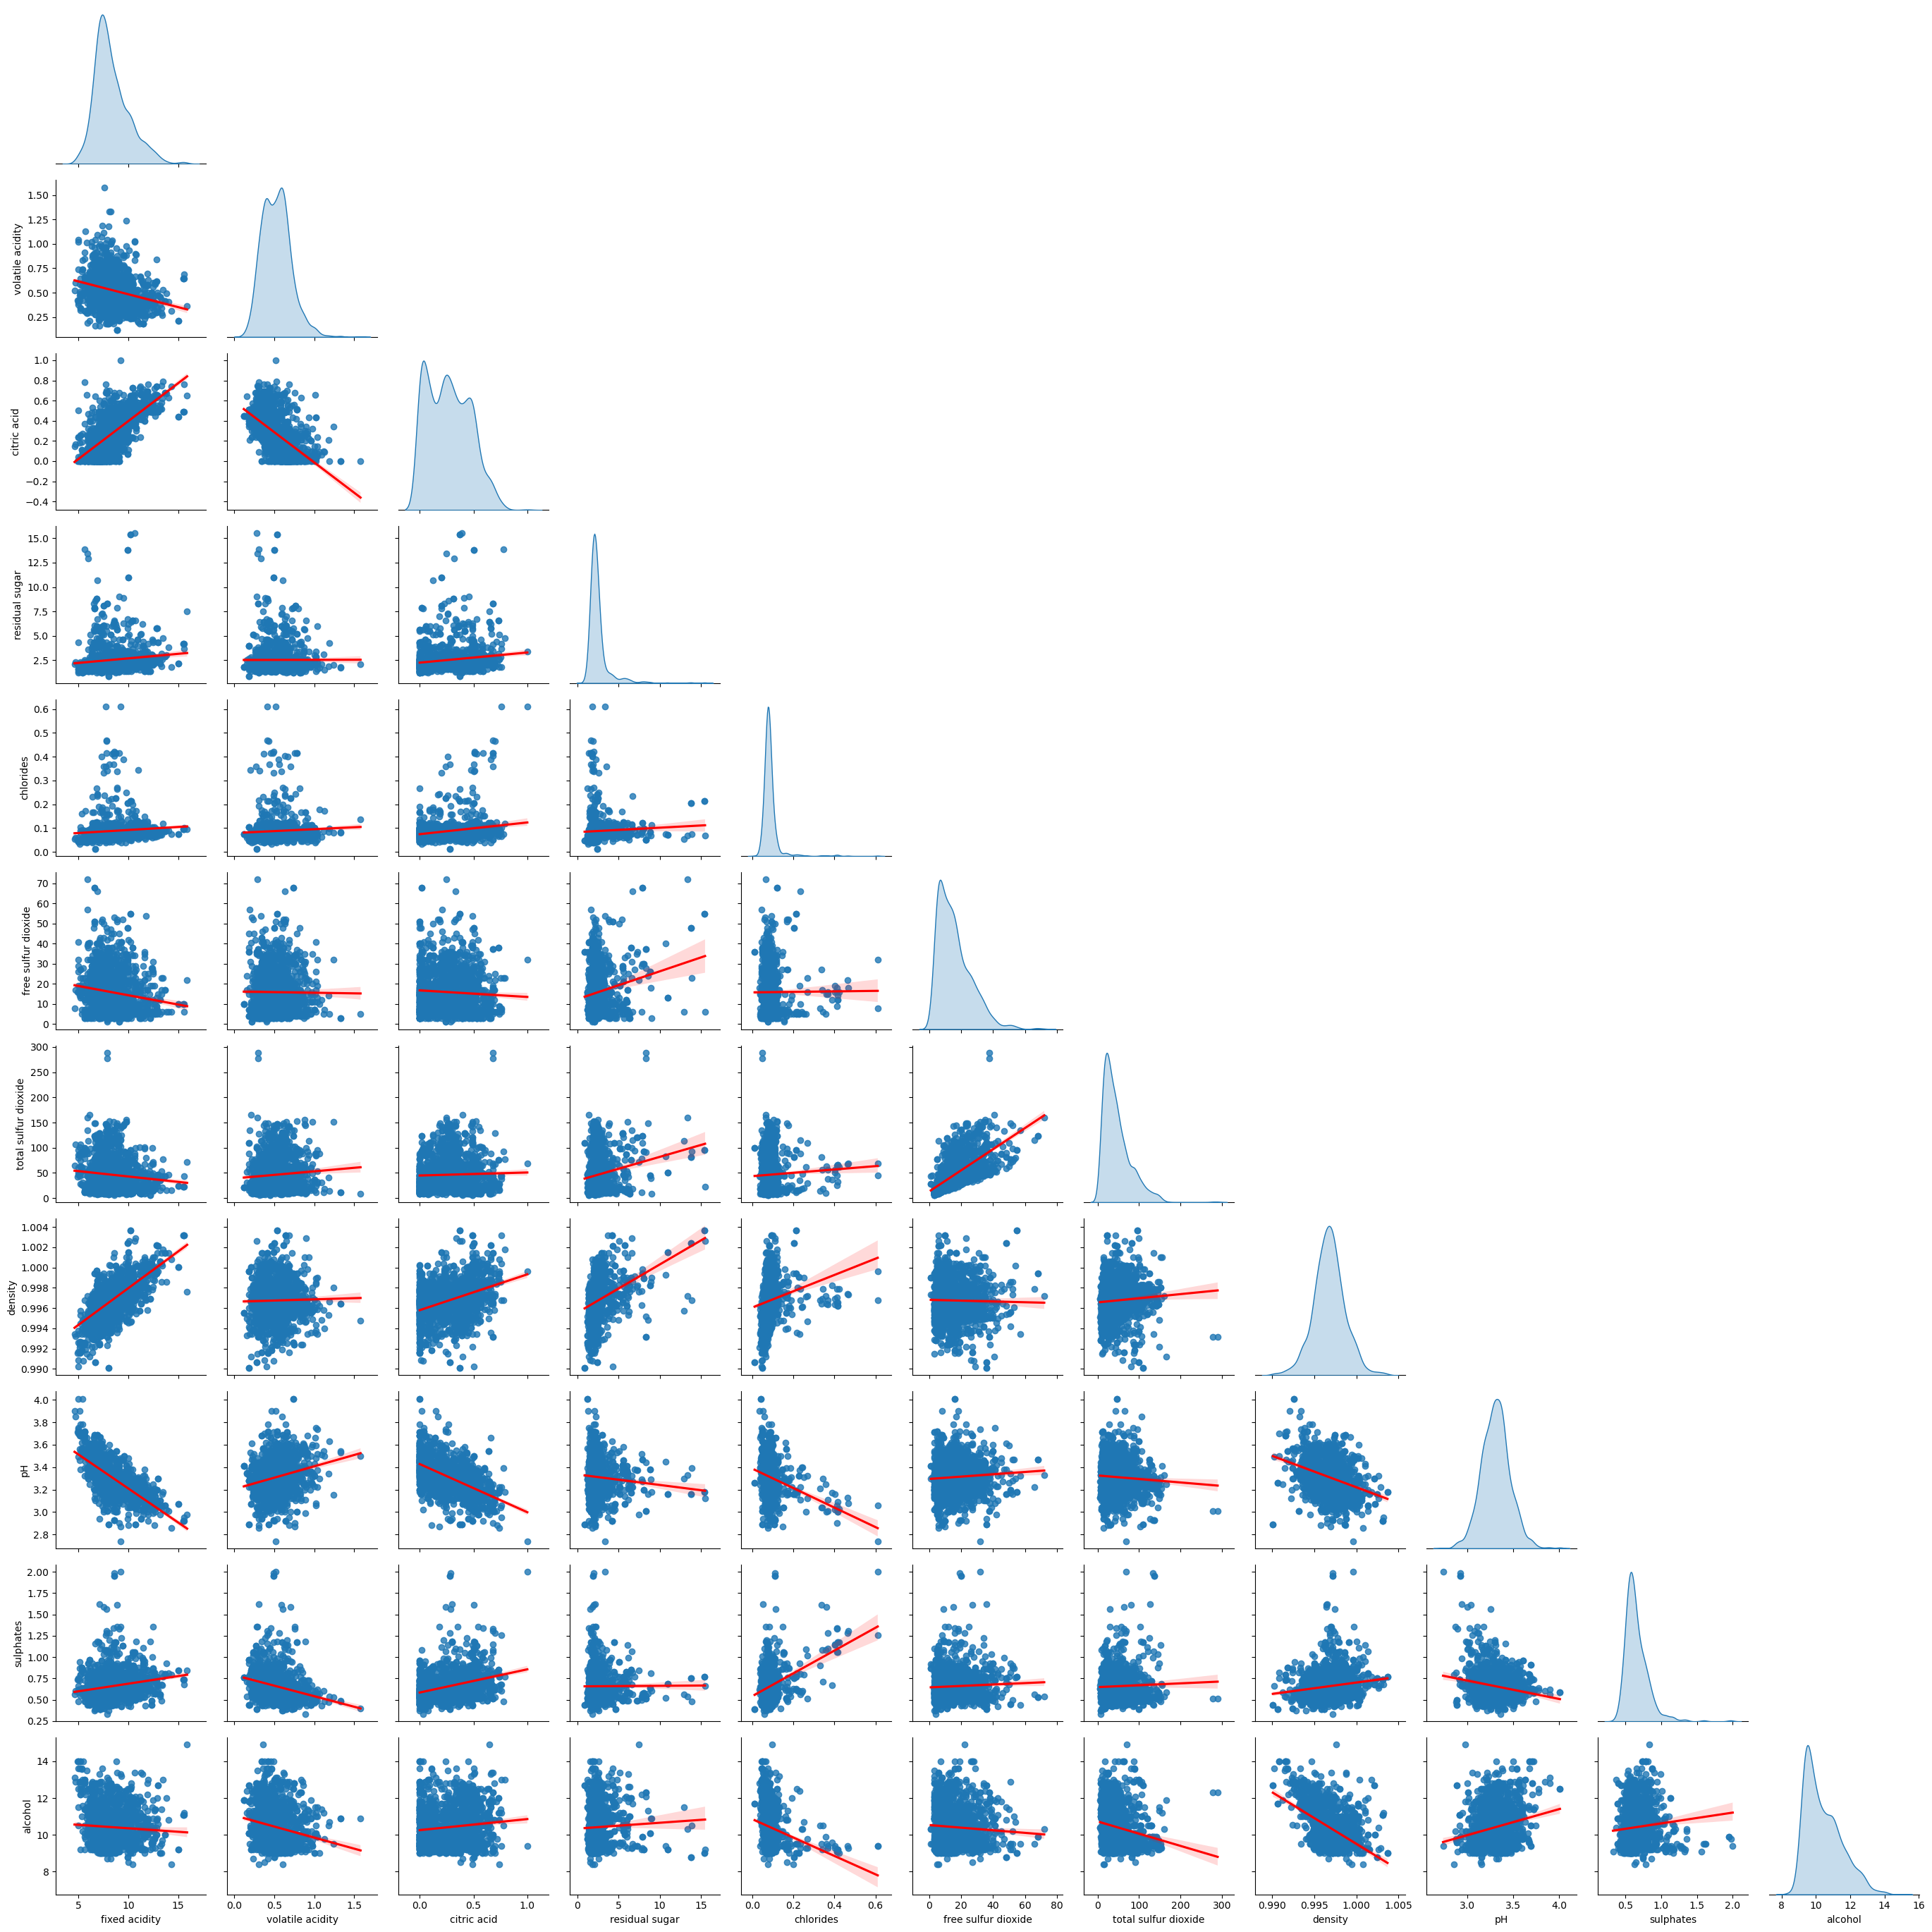

In [26]:
sns.pairplot(df.drop(columns='quality'),kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.tight_layout()
plt.show()

In [27]:
temp_corr=df.corr()
temp_corr.drop(columns=['quality'],index=['quality'],inplace=True)
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH'), ('free sulfur dioxide', 'total sulfur dioxide')]

Weak ->  [('fixed acidity', 'volatile acidity'), ('volatile acidity', 'sulphates'), ('citric acid', 'density'), ('citric acid', 'sulphates'), ('residual sugar', 'density'), ('chlorides', 'pH'), ('chlorides', 'sulphates'), ('density', 'pH'), ('density', 'alcohol')]

No_relationship ->  [('fixed acidity', 'residual sugar'), ('fixed acidity', 'chlorides'), ('fixed acidity', 'free sulfur dioxide'), ('fixed acidity', 'total sulfur dioxide'), ('fixed acidity', 'sulphates'), ('fixed acidity', 'alcohol'), ('volatile acidity', 'residual sugar'), ('volatile acidity', 'chlorides'), ('volatile acidity', 'free sulfur dioxide'), ('volatile acidity', 'total sulfur dioxide'), ('volatile acidity', 'density'), ('volatile acidity', 'pH'), ('volatile acidity', 'alcohol'), ('citric